# NaturalQuestions lost-in-the-middle Mistral-7B evaluation

In [1]:
import sys
sys.path.append('../')

In [2]:
from omegaconf import OmegaConf

In [3]:
class Args():  # Fake args
    def __init__(self):
        pass
args = Args()

## Load model

In [4]:
from model.pretrained import get_pretrained_loader

/nlp/scr/mzhang/miniconda3/envs/hedgehog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model_config = """
pretrained_config:
  pretrained_model_name_or_path: 'mistralai/Mistral-7B-v0.1'
  cache_dir: '/juice/scr/scr110/scr/nlp/data/neo/hub/'
  return_dict: true
  quantization: false
  device_map: auto
  low_cpu_mem_usage: true
  torch_dtype: bfloat16
  rope_theta: 10000.0
  use_flash_attention_2: true
"""
model_config = OmegaConf.create(model_config)

In [6]:
# Load pretrained model
model_loader = get_pretrained_loader(**model_config['pretrained_config'])
tokenizer = model_loader.load_tokenizer()
tokenizer.pad_token_id = tokenizer.eos_token_id
model = model_loader.load()

The model was loaded with use_flash_attention_2=True, which is deprecated and may be removed in a future release. Please use `attn_implementation="flash_attention_2"` instead.
Loading checkpoint shards: 100%|████████████████████████████████████████████████████████████████| 2/2 [02:08<00:00, 64.12s/it]


### Load data

In [7]:
import matplotlib.pyplot as plt

In [8]:
from dataloaders import load_data

2024-01-11 07:19:12.673693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 07:19:24.041832: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Setting tokenizer.pad_token to </s>


Map: 100%|███████████████████████████████████████████████████████████████████████| 2655/2655 [00:00<00:00, 3082.68 examples/s]


Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_train_lm_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_train_lm_anc
-> Tokenizing train_lm_anc dataset...


Saving the dataset (2/2 shards): 100%|██████████████████████████████████████████| 10620/10620 [00:15<00:00, 688.48 examples/s]


Tokenized train_lm_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_train_lm_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_lm_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_lm_anc
-> Tokenizing val_lm_anc dataset...


Saving the dataset (1/1 shards): 100%|████████████████████████████████████████████| 2655/2655 [00:03<00:00, 785.77 examples/s]


Tokenized val_lm_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_lm_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_train_lm_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_train_lm_pos
-> Tokenizing train_lm_pos dataset...


Saving the dataset (1/1 shards): 100%|████████████████████████████████████████| 10620/10620 [00:01<00:00, 10025.77 examples/s]


Tokenized train_lm_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_train_lm_pos!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_lm_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_lm_pos
-> Tokenizing val_lm_pos dataset...


Saving the dataset (1/1 shards): 100%|███████████████████████████████████████████| 2655/2655 [00:00<00:00, 9863.94 examples/s]


Tokenized val_lm_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_lm_pos!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_anc
-> Tokenizing val_anc dataset...


Saving the dataset (1/1 shards): 100%|███████████████████████████████████████████| 2655/2655 [00:02<00:00, 1081.60 examples/s]


Tokenized val_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_pos
-> Tokenizing val_pos dataset...


Saving the dataset (1/1 shards): 100%|██████████████████████████████████████████| 2655/2655 [00:00<00:00, 13975.85 examples/s]


Tokenized val_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_pos!


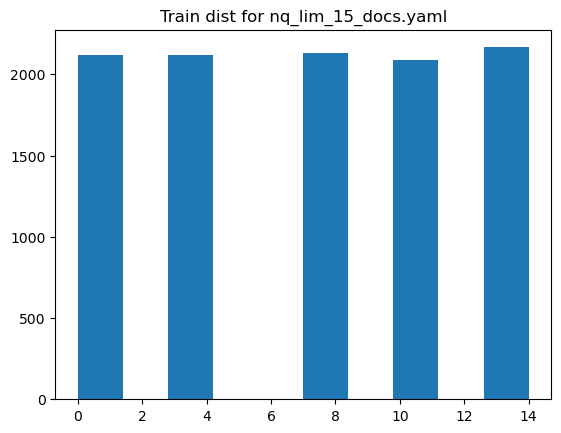

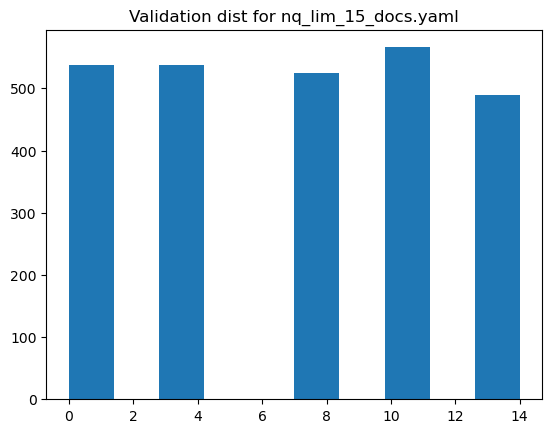

Setting tokenizer.pad_token to </s>


Map: 100%|███████████████████████████████████████████████████████████████████████| 2655/2655 [00:01<00:00, 2343.84 examples/s]


Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_train_lm_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_val_lm_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_train_lm_pos!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_val_lm_pos!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_val_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_val_pos!


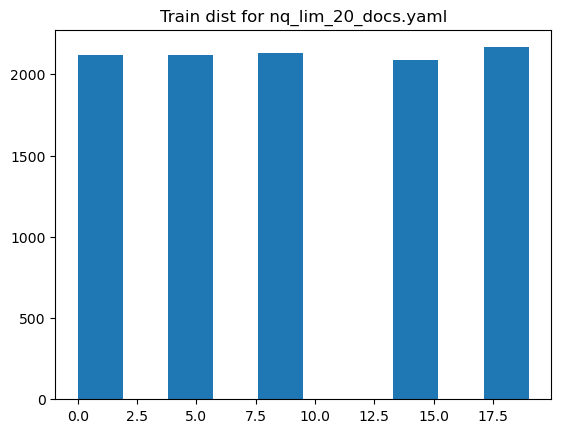

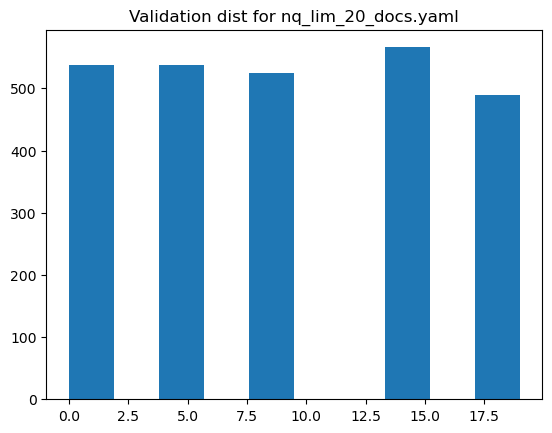

In [9]:
for n_docs in [15, 20]:  # 5, 10, 
    config_path = f'../configs/experiment/nq_lim_{n_docs}_docs.yaml'
    config = OmegaConf.load(config_path)
    # Update tokenizer to match model
    for k in ['pretrained_model_name_or_path', 'cache_dir']:
        config.dataset.pretrained_model_config[k] = model_config.pretrained_config[k]
    dataloaders = load_data(config['dataset'], config['dataloader'])

    plt.hist([dataloaders['train_contrast'].dataset[_ix]['support_indices'][0] 
              for _ix in range(len(dataloaders['train_contrast'].dataset))])
    plt.title(f'Train dist for {config_path.split("/")[-1]}')
    plt.show()

    plt.hist([dataloaders['val_contrast'].dataset[_ix]['support_indices'][0] 
              for _ix in range(len(dataloaders['val_contrast'].dataset))])
    plt.title(f'Validation dist for {config_path.split("/")[-1]}')
    plt.show()

## Initial evaluation

In [10]:
import numpy as np
from logging_utils import print_header
from evaluate.subspan_em import plot_lineplot_em, evaluate_mqa, plot_histogram_em 

Setting tokenizer.pad_token to </s>


Map: 100%|███████████████████████████████████████████████████████████████████████| 2655/2655 [00:00<00:00, 6743.33 examples/s]


Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_train_lm_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_train_lm_anc
-> Tokenizing train_lm_anc dataset...


Saving the dataset (1/1 shards): 100%|█████████████████████████████████████████| 10620/10620 [00:08<00:00, 1262.75 examples/s]


Tokenized train_lm_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_train_lm_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_lm_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_lm_anc
-> Tokenizing val_lm_anc dataset...


Saving the dataset (1/1 shards): 100%|███████████████████████████████████████████| 2655/2655 [00:01<00:00, 2281.63 examples/s]


Tokenized val_lm_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_lm_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_train_lm_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_train_lm_pos
-> Tokenizing train_lm_pos dataset...


Saving the dataset (1/1 shards): 100%|████████████████████████████████████████| 10620/10620 [00:01<00:00, 10021.82 examples/s]


Tokenized train_lm_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_train_lm_pos!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_lm_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_lm_pos
-> Tokenizing val_lm_pos dataset...


Saving the dataset (1/1 shards): 100%|███████████████████████████████████████████| 2655/2655 [00:00<00:00, 9843.98 examples/s]


Tokenized val_lm_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_lm_pos!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_anc
-> Tokenizing val_anc dataset...


Saving the dataset (1/1 shards): 100%|███████████████████████████████████████████| 2655/2655 [00:00<00:00, 3168.01 examples/s]


Tokenized val_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_pos
-> Tokenizing val_pos dataset...


Saving the dataset (1/1 shards): 100%|██████████████████████████████████████████| 2655/2655 [00:00<00:00, 13708.72 examples/s]


Tokenized val_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_pos!


Evaluating:   0%|                                                                                     | 0/100 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.

-> Overall Subspan Exact Match: 0.4752


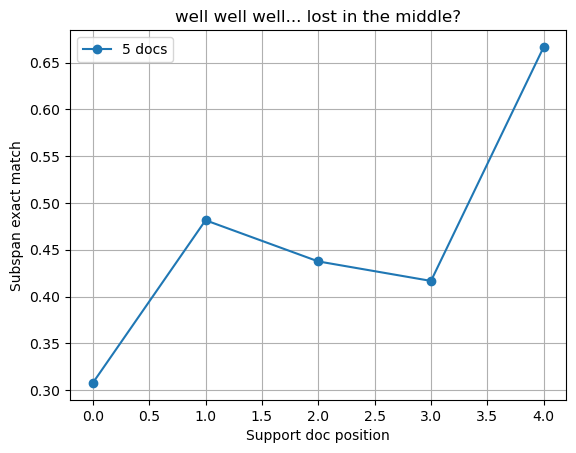

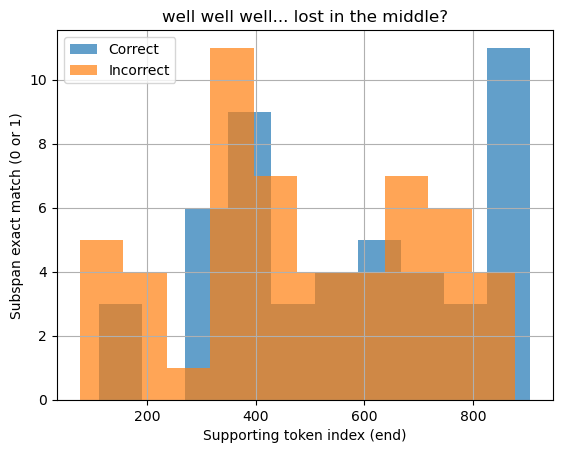

-> Support Document at 0 Supspan EM: 0.3077
-> Support Document at 1 Supspan EM: 0.4815
-> Support Document at 2 Supspan EM: 0.4375
-> Support Document at 3 Supspan EM: 0.4167
-> Support Document at 4 Supspan EM: 0.6667
Setting tokenizer.pad_token to </s>


Map: 100%|███████████████████████████████████████████████████████████████████████| 2655/2655 [00:00<00:00, 4292.83 examples/s]


Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_train_lm_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_train_lm_anc
-> Tokenizing train_lm_anc dataset...


Saving the dataset (2/2 shards): 100%|█████████████████████████████████████████| 10620/10620 [00:10<00:00, 1024.75 examples/s]


Tokenized train_lm_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_train_lm_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_lm_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_lm_anc
-> Tokenizing val_lm_anc dataset...


Saving the dataset (1/1 shards): 100%|███████████████████████████████████████████| 2655/2655 [00:02<00:00, 1167.80 examples/s]


Tokenized val_lm_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_lm_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_train_lm_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_train_lm_pos
-> Tokenizing train_lm_pos dataset...


Saving the dataset (1/1 shards): 100%|█████████████████████████████████████████| 10620/10620 [00:01<00:00, 9965.76 examples/s]


Tokenized train_lm_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_train_lm_pos!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_lm_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_lm_pos
-> Tokenizing val_lm_pos dataset...


Saving the dataset (1/1 shards): 100%|███████████████████████████████████████████| 2655/2655 [00:00<00:00, 9817.69 examples/s]


Tokenized val_lm_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_lm_pos!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_anc not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_anc
-> Tokenizing val_anc dataset...


Saving the dataset (1/1 shards): 100%|███████████████████████████████████████████| 2655/2655 [00:01<00:00, 1613.08 examples/s]


Tokenized val_anc dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_anc!
Directory /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_pos not found
-> Created /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_pos
-> Tokenizing val_pos dataset...


Saving the dataset (1/1 shards): 100%|██████████████████████████████████████████| 2655/2655 [00:00<00:00, 13850.82 examples/s]


Tokenized val_pos dataset saved to /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_5_7_9_Mistral-7B-v0.1_val_pos!


Evaluating:   0%|                                                                                     | 0/100 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.

-> Overall Subspan Exact Match: 0.3564


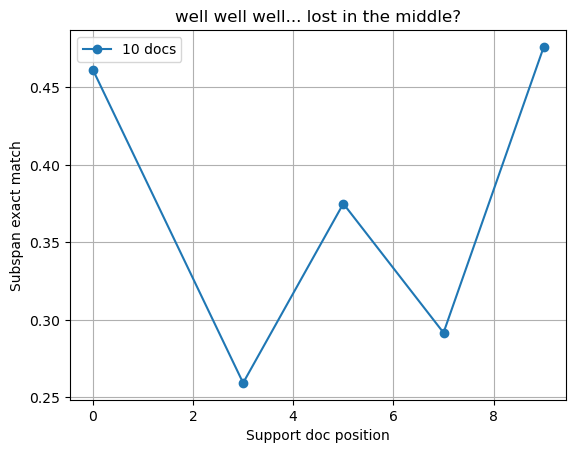

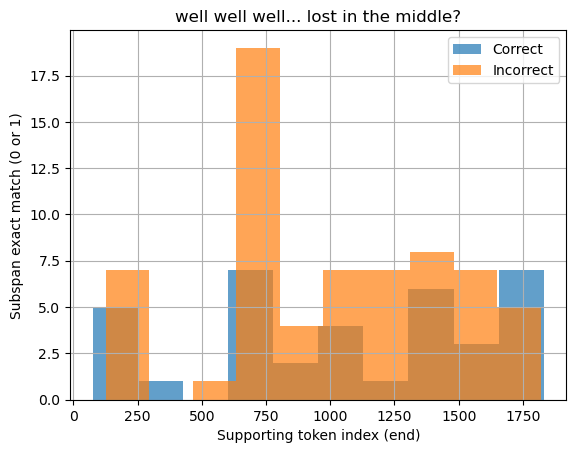

-> Support Document at 0 Supspan EM: 0.4615
-> Support Document at 3 Supspan EM: 0.2593
-> Support Document at 5 Supspan EM: 0.3750
-> Support Document at 7 Supspan EM: 0.2917
-> Support Document at 9 Supspan EM: 0.4762
Setting tokenizer.pad_token to </s>


Map: 100%|███████████████████████████████████████████████████████████████████████| 2655/2655 [00:00<00:00, 3203.34 examples/s]


Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_train_lm_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_lm_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_train_lm_pos!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_lm_pos!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_3_7_11_14_Mistral-7B-v0.1_val_pos!


Evaluating:   0%|                                                                                     | 0/100 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a c

-> Overall Subspan Exact Match: 0.3861


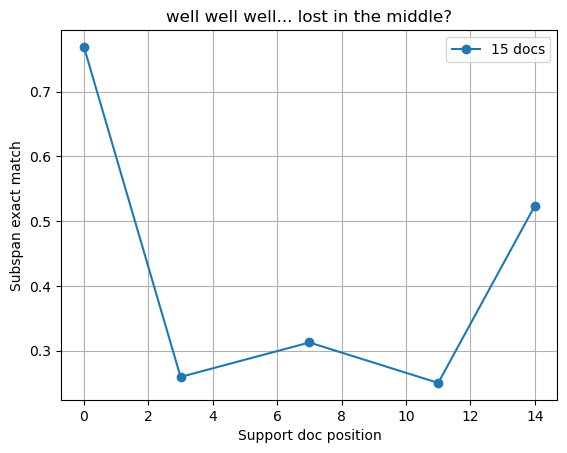

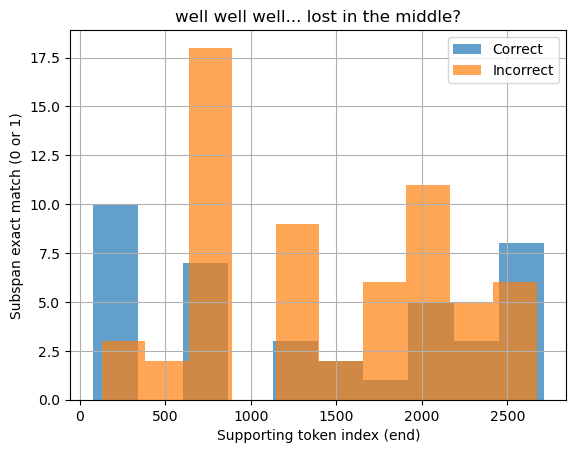

-> Support Document at 0 Supspan EM: 0.7692
-> Support Document at 3 Supspan EM: 0.2593
-> Support Document at 7 Supspan EM: 0.3125
-> Support Document at 11 Supspan EM: 0.2500
-> Support Document at 14 Supspan EM: 0.5238
Setting tokenizer.pad_token to </s>


Map: 100%|███████████████████████████████████████████████████████████████████████| 2655/2655 [00:01<00:00, 2527.60 examples/s]


Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_train_lm_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_val_lm_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_train_lm_pos!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_val_lm_pos!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_val_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_4_9_14_19_Mistral-7B-v0.1_val_pos!


Evaluating:   0%|                                                                                     | 0/100 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.

-> Overall Subspan Exact Match: 0.4059


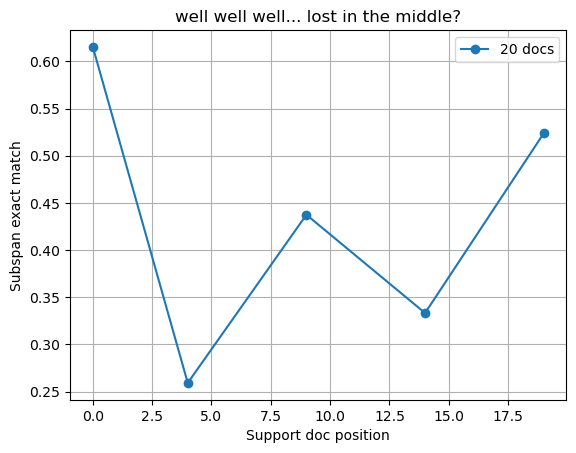

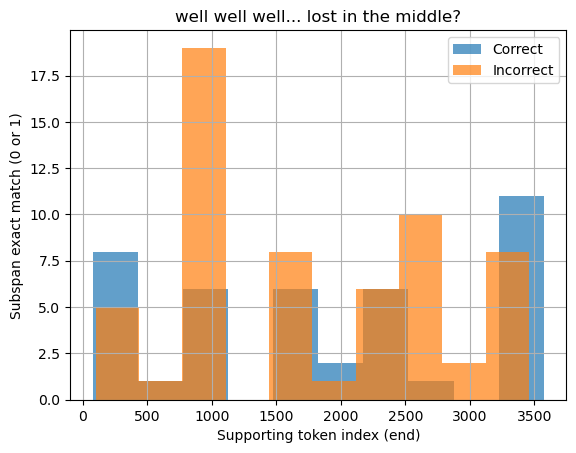

-> Support Document at 0 Supspan EM: 0.6154
-> Support Document at 4 Supspan EM: 0.2593
-> Support Document at 9 Supspan EM: 0.4375
-> Support Document at 14 Supspan EM: 0.3333
-> Support Document at 19 Supspan EM: 0.5238


In [11]:
eval_config = """
max_new_tokens: 128
max_samples: 100
negative_sample: false
print_outputs: false
"""
eval_config = OmegaConf.create(eval_config)

all_eval_metrics = {}
for n_docs in [5, 10, 15, 20]:
    config_path = f'../configs/experiment/nq_lim_{n_docs}_docs.yaml'
    config = OmegaConf.load(config_path)
    # Update tokenizer to match model
    for k in ['pretrained_model_name_or_path', 'cache_dir']:
        config.dataset.pretrained_model_config[k] = model_config.pretrained_config[k]
    dataloaders = load_data(config['dataset'], config['dataloader'])

    eval_loader = dataloaders['val_anc']
    eval_metrics = evaluate_mqa(model, eval_loader, tokenizer, **eval_config)

    mean_em = np.mean(eval_metrics['subspan_em'])
    print(f'-> Overall Subspan Exact Match: {mean_em:.4f}')

    all_eval_metrics[n_docs] = eval_metrics
    
    # Slice by supporting document index
    em_by_doc_idx = plot_lineplot_em(eval_metrics, 'support_doc_index',
                                     f'well well well... lost in the middle?', 
                                     f'{n_docs} docs', show_plot=True)
    plot_histogram_em(eval_metrics, 'well well well... lost in the middle?', show_plot = True)
    for idx, doc_pos in enumerate(em_by_doc_idx['document_position']):
        _em = em_by_doc_idx['subspan_em'][idx]
        print(f'-> Support Document at {doc_pos} Supspan EM: {_em:.4f}') 

Setting tokenizer.pad_token to </s>


Map: 100%|███████████████████████████████████████████████████████████████████████| 2655/2655 [00:00<00:00, 7172.57 examples/s]


Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_train_lm_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_lm_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_train_lm_pos!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_lm_pos!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_anc!
Tokenized dataset loaded from /juice/scr/scr110/scr/nlp/data/lost-in-the-middle/qa_data/robust_context.nq_lim_gold_at_0_1_2_3_4_Mistral-7B-v0.1_val_pos!


Evaluating:   0%|                                                                                     | 0/100 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
huggingface/tokenizers: The current process just got forked, after parallelism has already been 

-> Overall Subspan Exact Match: 0.5941


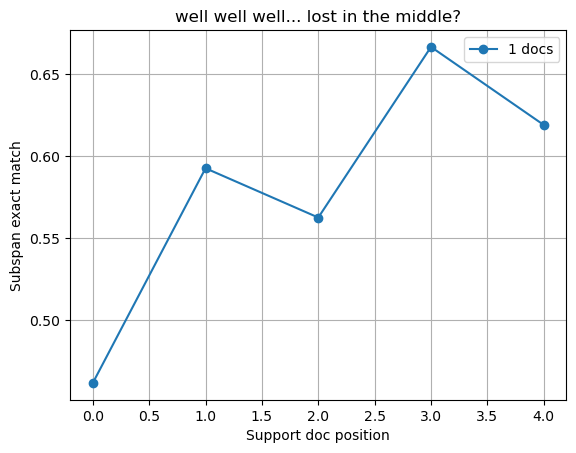

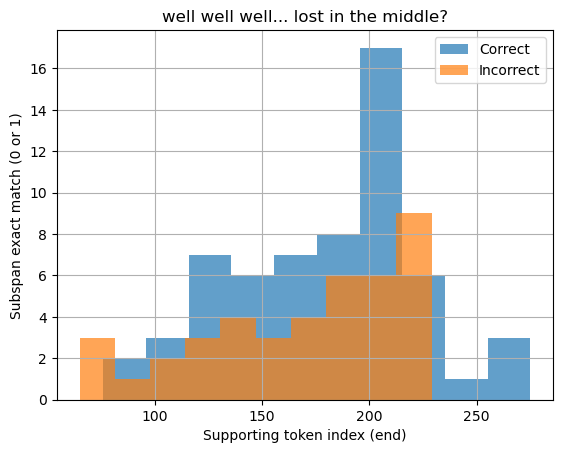

-> Support Document at 0 Supspan EM: 0.4615
-> Support Document at 1 Supspan EM: 0.5926
-> Support Document at 2 Supspan EM: 0.5625
-> Support Document at 3 Supspan EM: 0.6667
-> Support Document at 4 Supspan EM: 0.6190


In [12]:
# Ground-truth

for n_docs in [1]:
    config_path = f'../configs/experiment/nq_lim_5_docs.yaml'
    config = OmegaConf.load(config_path)
    # Update tokenizer to match model
    for k in ['pretrained_model_name_or_path', 'cache_dir']:
        config.dataset.pretrained_model_config[k] = model_config.pretrained_config[k]
    dataloaders = load_data(config['dataset'], config['dataloader'])

    eval_loader = dataloaders['val_pos']
    eval_metrics = evaluate_mqa(model, eval_loader, tokenizer, **eval_config)

    mean_em = np.mean(eval_metrics['subspan_em'])
    print(f'-> Overall Subspan Exact Match: {mean_em:.4f}')

    all_eval_metrics[n_docs] = eval_metrics
    
    # Slice by supporting document index
    em_by_doc_idx = plot_lineplot_em(eval_metrics, 'support_doc_index',
                                     f'well well well... lost in the middle?', 
                                     f'{n_docs} docs', show_plot=True)
    plot_histogram_em(eval_metrics, 'well well well... lost in the middle?', show_plot = True)
    for idx, doc_pos in enumerate(em_by_doc_idx['document_position']):
        _em = em_by_doc_idx['subspan_em'][idx]
        print(f'-> Support Document at {doc_pos} Supspan EM: {_em:.4f}') 

In [13]:
_x = """-> Support Document at 0 Supspan EM: 0.4615
-> Support Document at 1 Supspan EM: 0.5926
-> Support Document at 2 Supspan EM: 0.5625
-> Support Document at 3 Supspan EM: 0.6667
-> Support Document at 4 Supspan EM: 0.6190
""".split('\n')[:-1]
sum([float(x.split(' ')[-1]) for x in _x]) / 5

0.5804600000000001

In [14]:
all_eval_metrics.keys()

dict_keys([5, 10, 15, 20, 1])

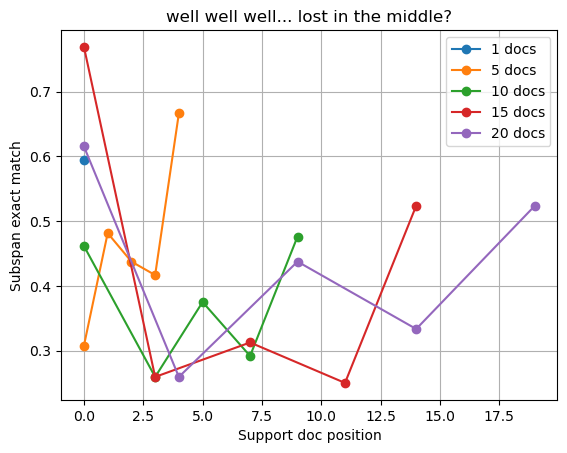

In [16]:
eval_config = """
max_new_tokens: 128
max_samples: 100
negative_sample: false
print_outputs: false
"""
eval_config = OmegaConf.create(eval_config)

for n_docs in [1, 5, 10, 15, 20]:
    _eval_metrics = all_eval_metrics[n_docs]
    if n_docs == 1:
        _eval_metrics['support_doc_index'] = [0] * len(_eval_metrics['support_doc_index'])
# for n_docs, _eval_metrics in all_eval_metrics.items():
    plot_lineplot_em(_eval_metrics, 'support_doc_index',
                     f'well well well... lost in the middle?', 
                     f'{n_docs} docs', show_plot=n_docs == 20)

0.594059405940594 0.2411528281541025
0.4752475247524752 0.24938731496912078
0.3564356435643564 0.2293892755612195
0.38613861386138615 0.23703558474659353
0.40594059405940597 0.2411528281541025


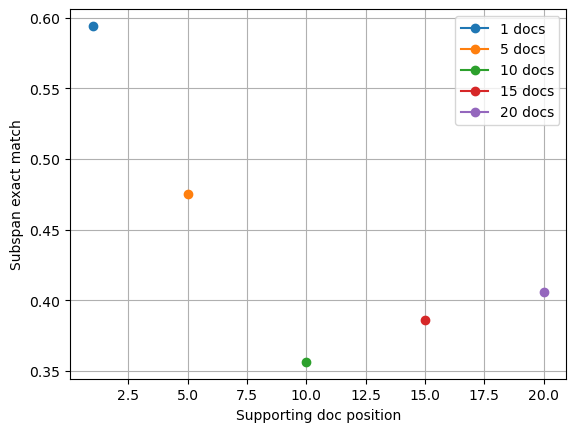

In [17]:
for n_docs in [1, 5, 10, 15, 20]:
    _eval_metrics = all_eval_metrics[n_docs]
    mean, std =  _eval_metrics['subspan_em'].mean(), _eval_metrics['subspan_em'].std()
    print(mean, std ** 2)
    # plt.errorbar(n_docs, mean, std ** 2, marker='o', label=f'{n_docs} docs')
    plt.plot(n_docs, mean, marker='o', label=f'{n_docs} docs')
    plt.grid()
plt.xlabel('Supporting doc position')
plt.ylabel('Subspan exact match')
plt.legend()
plt.show()
